## Detector de frutas con imágenes

In [1]:
## Librerías
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob as gb
import os

In [2]:
# Paths de imagenes
train = "Fruits/MY_data/train/"
test = "Fruits/MY_data/test/"
predict = "Fruits/MY_data/predict/"

### Checar paths y archivos dentro de cada carpeta

In [3]:
for folder in os.listdir(train):
    files = gb.glob(pathname=str(train+folder + "/*.jpeg"))
    print(f"for training data , found {len(files)} in folder {folder}")

for training data , found 230 in folder apple
for training data , found 230 in folder avocado
for training data , found 230 in folder banana
for training data , found 230 in folder cherry
for training data , found 230 in folder kiwi
for training data , found 231 in folder mango
for training data , found 229 in folder orange
for training data , found 230 in folder pinenapple
for training data , found 230 in folder strawberries
for training data , found 230 in folder watermelon


In [4]:
for folder in os.listdir(test):
    files = gb.glob(pathname=str(test+folder + "/*.jpeg"))
    print(f"for test data , found {len(files)} in folder {folder}")

for test data , found 89 in folder apple
for test data , found 105 in folder avocado
for test data , found 106 in folder banana
for test data , found 105 in folder cherry
for test data , found 105 in folder kiwi
for test data , found 105 in folder mango
for test data , found 97 in folder orange
for test data , found 105 in folder pinenapple
for test data , found 103 in folder strawberries
for test data , found 105 in folder watermelon


In [5]:
print("Predict data: {}".format(len(os.listdir(predict))))

Predict data: 48


In [6]:
classes = {"apple" : 0, "avocado" :1 , "banana" :2 , "cherry" :3 , "kiwi" :4 , "mango" :5 , "orange" :6 , "pinenapple" :7 ,
        "strawberries" :8 , "watermelon" :9 }

def get_code_key(value: int):
    list_k = list(classes.keys())
    return list_k[value]

print(classes["cherry"])
print(get_code_key(classes["cherry"]))

3
cherry


In [7]:
s = 150

In [8]:
## Guardar los valores de la fruta de test en arreglos de numeros
x_test = []
y_test = []
for folder in os.listdir(test):
    files = gb.glob(pathname=str(test+folder + "/*.jpeg"))
    for file in files:
        image = cv.imread(file)
        image_array = cv.resize(image , (s,s))
        x_test.append(np.array(image_array))
        y_test.append(classes[folder])

x_text = np.array(x_test)
y_test = np.array(y_test)

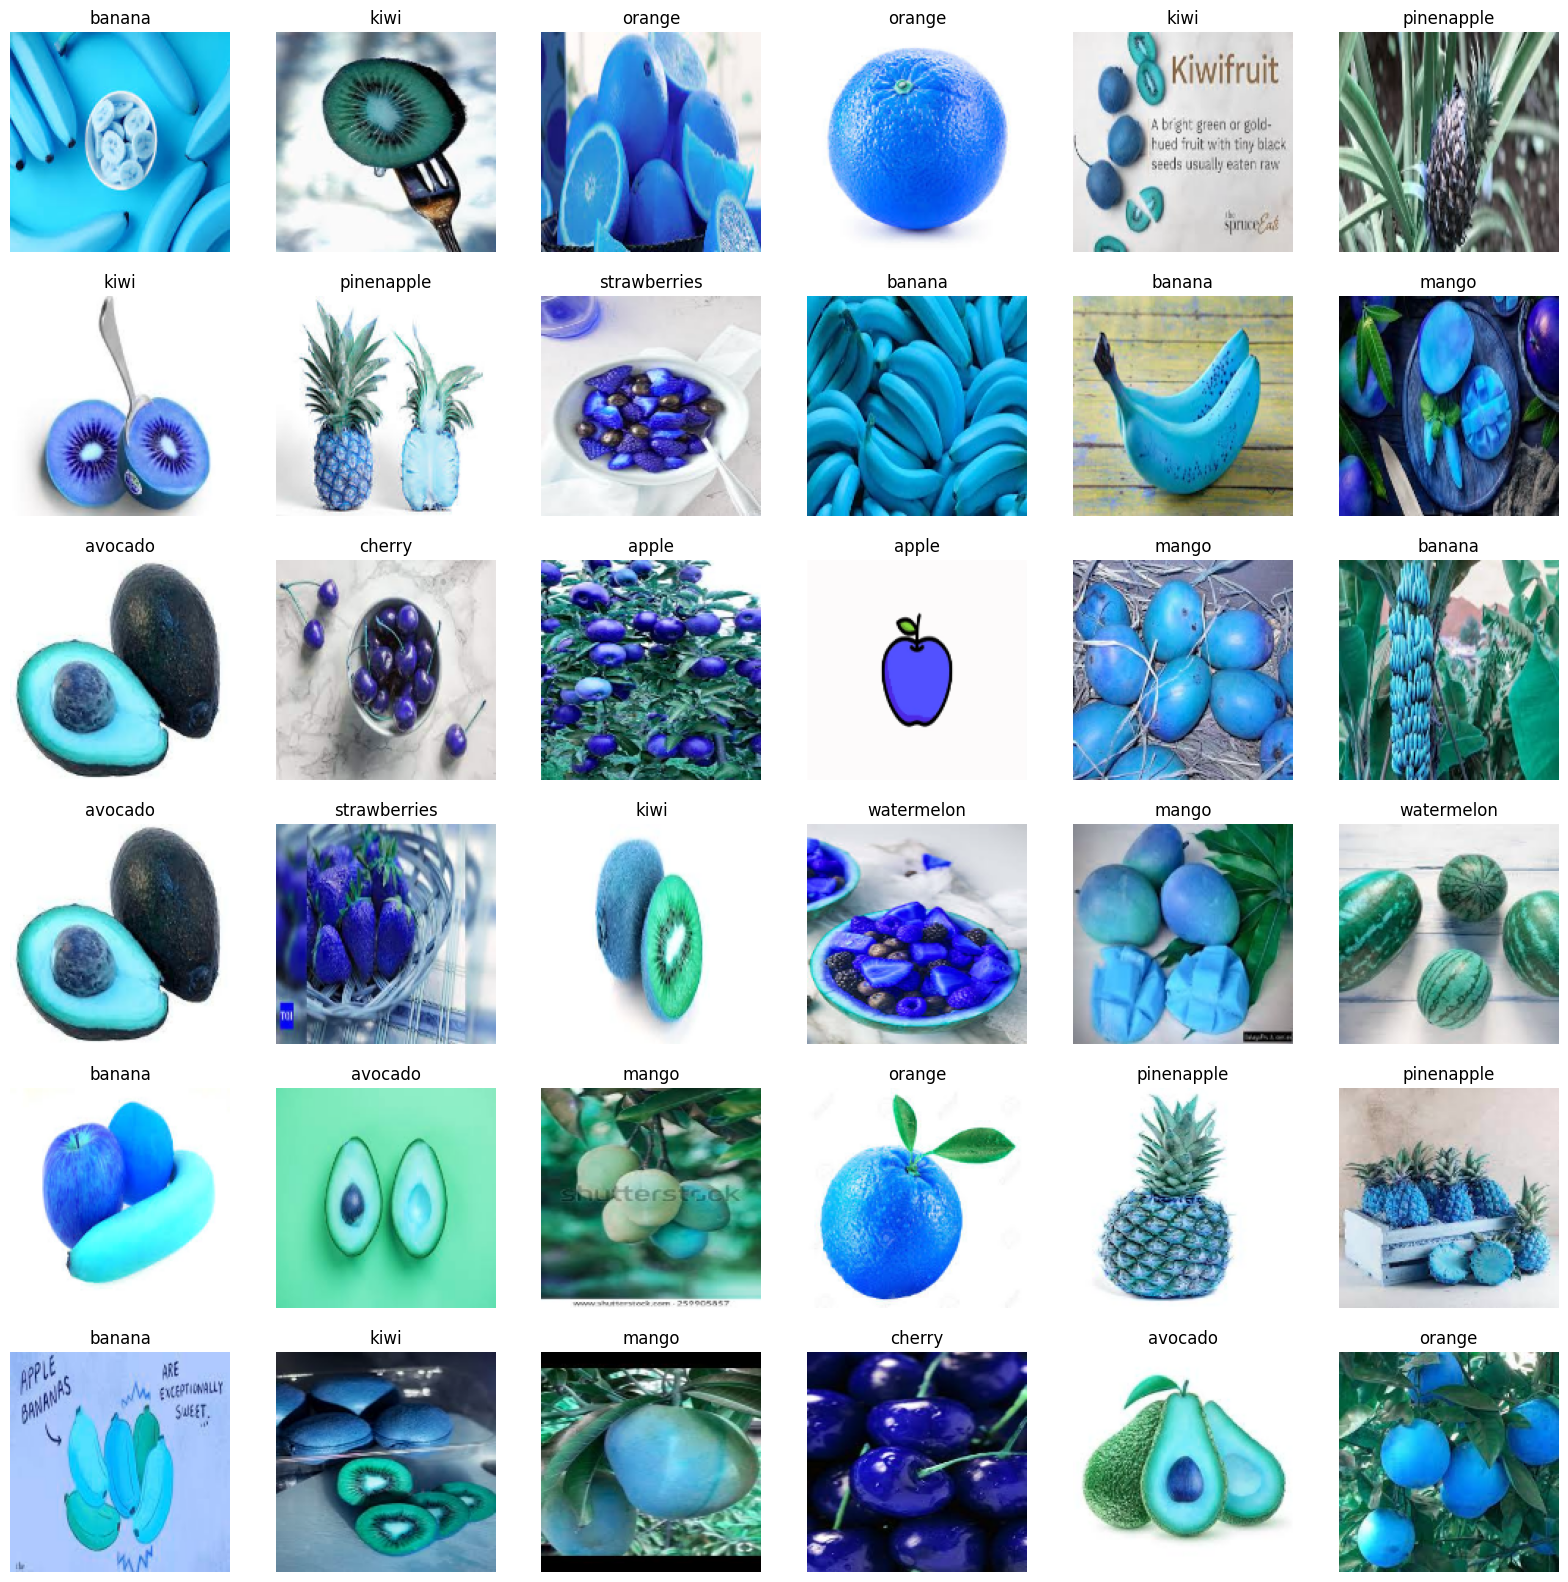

In [9]:
l = len(x_test)
plt.figure(figsize=(20 , 20))
for n , i in enumerate(list(np.random.randint(0 , l ,36 ))) :
    plt.subplot(6 , 6 , n+1)
    plt.imshow(x_test[i])
    plt.axis("off")
    plt.title(get_code_key(y_test[i]))

In [10]:
## Guardar los valores de la fruta de train en arreglos de numeros
x_train = []
y_train = []
for folder in os.listdir(train):
    files = gb.glob(pathname=str(train+folder + "/*.jpeg"))
    for file in files:
        image = cv.imread(file)
        image_array = cv.resize(image , (s,s))
        x_train.append(np.array(image_array))
        y_train.append(classes[folder])
        
x_train = np.array(x_train)
y_train = np.array(y_train)

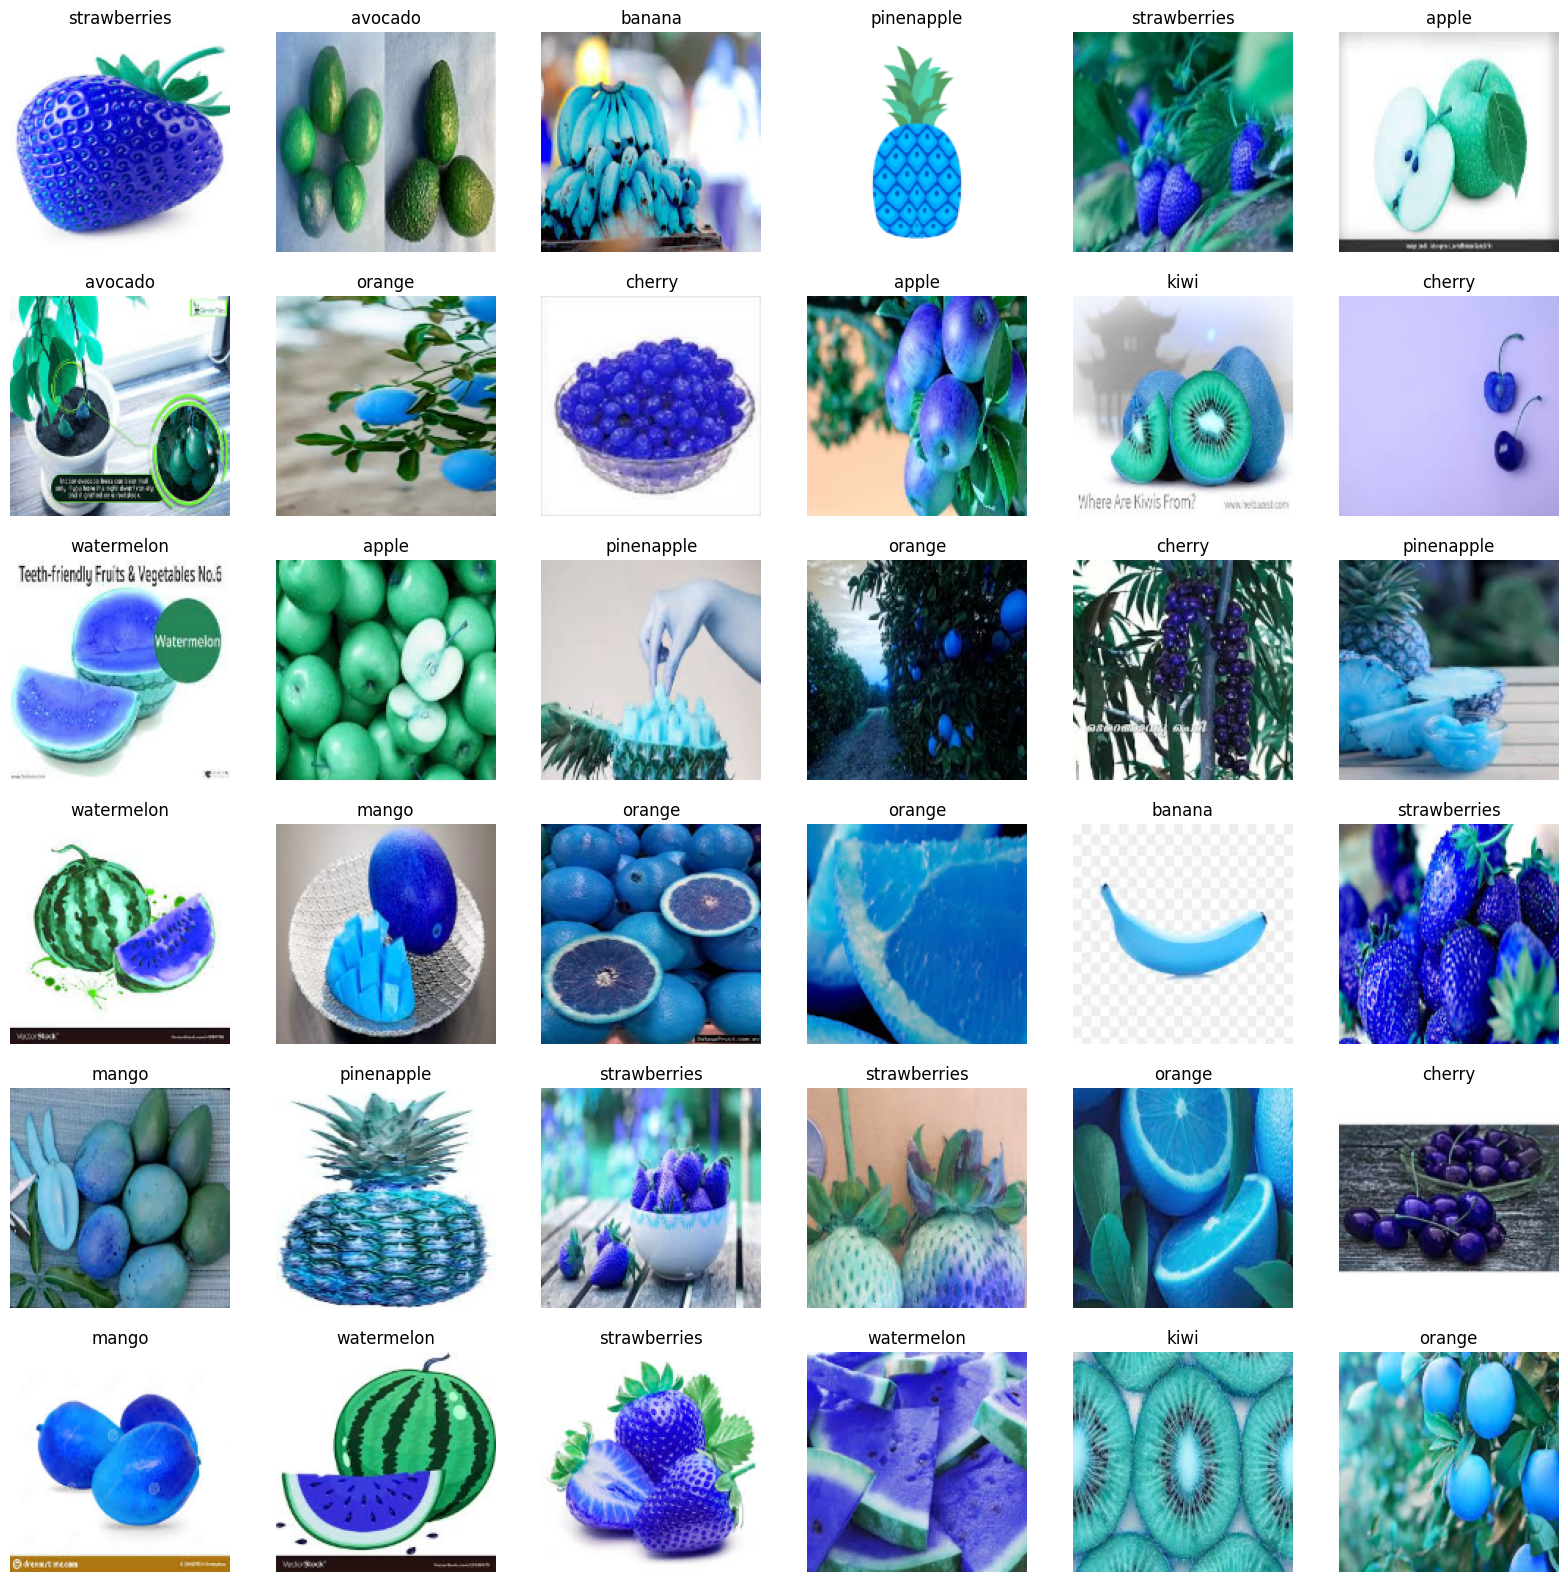

In [11]:
l = len(x_train)
plt.figure(figsize=(20 , 20))
for n , i in enumerate(list(np.random.randint(0 , l ,36 ))) :
    plt.subplot(6 , 6 , n+1)
    plt.imshow(x_train[i])
    plt.axis("off")
    plt.title(get_code_key(y_train[i]))

In [12]:
print(x_train.shape)

(2300, 150, 150, 3)


In [13]:
model = keras.models.Sequential([
    keras.layers.Conv2D(250, kernel_size=(3,3), activation="relu", input_shape=(s,s,3)) ,
    keras.layers.Conv2D(230 , kernel_size = (3 , 3) , activation="relu") ,
    keras.layers.Conv2D(200 , kernel_size = (3 , 3) , activation="relu") ,
    
    keras.layers.MaxPool2D(6,6) ,
    
    keras.layers.Conv2D(180 , kernel_size = (3 , 3) , activation="relu") ,
    keras.layers.Conv2D(150 , kernel_size = (3 , 3) , activation="relu") ,
    keras.layers.Conv2D(100 , kernel_size = (3 , 3) , activation="relu") ,
    
    keras.layers.MaxPool2D(6 , 6) ,
    
    keras.layers.Flatten() , 
    
    keras.layers.Dense(120 , activation="relu") ,
    keras.layers.Dense(100 , activation="relu") ,
    keras.layers.Dense(50 , activation="relu") ,
    
    keras.layers.Dropout(rate=0.3) , 
    keras.layers.Dense(10 , activation="softmax") 
])


model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])

model.summary()

d:\Python\Python 3.11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 250)  │         7,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 230)  │       517,730 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 144, 144, 200)  │       414,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 180)    │       324,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 20, 20, 150)    │       243,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 18, 18, 100)    │       135,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 900)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       108,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,767,140 (6.74 MB)

 Trainable params: 1,767,140 (6.74 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(x_train, y_train, epochs=30, batch_size=64)

Epoch 1/30
 2/36 ━━━━━━━━━━━━━━━━━━━━ 3:08:32 333s/step - accuracy: 0.1523 - loss: 9.7679